<a href="https://colab.research.google.com/github/drameyjoshi/statistics/blob/master/all-of-stats/Univariate_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as scstat
import matplotlib.pyplot as plt

In [27]:
def plot_samples(samples: np.ndarray,
                 estimate_at: np.ndarray,
                 dist: str,
                 title: str,
                 n_sims: int = 1000) -> None:
    min_points_in_bin = 20
    kde_vals = scstat.gaussian_kde(samples).evaluate(estimate_at)
    plt.hist(samples, bins=int(n_sims/min_points_in_bin), density=True, label=dist)
    plt.plot(estimate_at, kde_vals, label='KDE')
    plt.title(title)
    plt.legend()

In [22]:
rng = np.random.default_rng()

# Bernoulli

A Bernoulli random variable takes one of two values, usually called $0$ and $1$, with a probability $p$. We generate an outcome of $N$ Bernoulli trials using the `np.randon.Binomial` function.

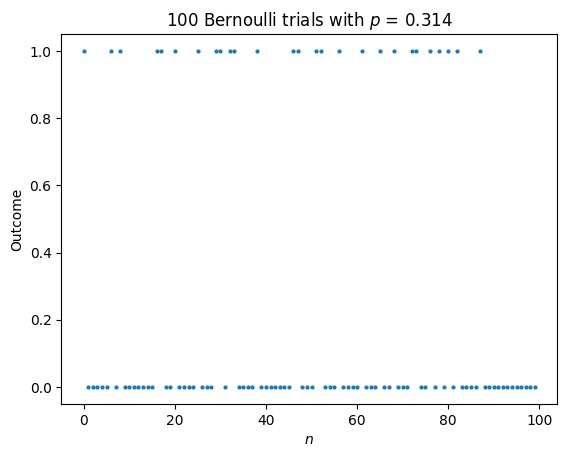

In [23]:
n_sims = 100 # Number of trials.
p = np.round(np.pi/10, 3) # Probability of success.
X_Ber = rng.binomial(size=n_sims, n=1, p=p)
_ = plt.scatter([n for n in range(0, n_sims)], X_Ber, s = 4)
_ = plt.xlabel(r'$n$')
_ = plt.ylabel('Outcome')
_ = plt.title('{0} Bernoulli trials with $p$ = {1}'.format(n_sims, p))

With a rather low probability of success, the number of times the trials succeeded is rather modest. It will not be surprising to find it not exactly $p$.

#Binomial
A binomial random variable counts the number of successes in $n$ Bernoulli trials when the probability of success is $p$.

In [24]:
n_trials = 1000
n_successes = rng.binomial(size=n_sims, n=n_trials, p=p)

In [25]:
sigma = np.sqrt(n_trials * p * (1 - p))
mu = n_trials * p
limits = mu + np.array([-1, 1]) * 3 * sigma
estimate_at = np.linspace(start=limits[0], stop=limits[1], num=50)

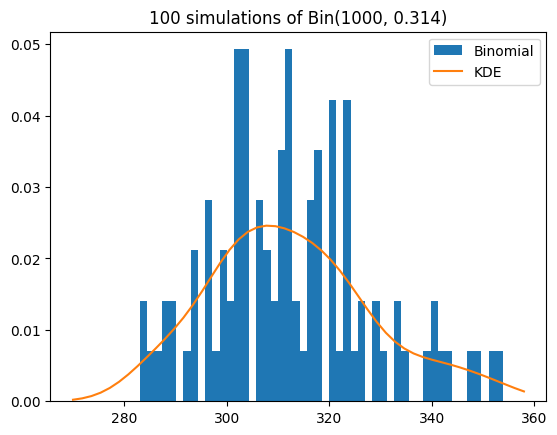

In [29]:
plot_samples(samples=n_successes,
             estimate_at=estimate_at,
             dist='Binomial',
             title='{0} simulations of Bin({1}, {2})'.format(n_sims, n_trials, p))

# Geometric
A geometric random variable counts the number of times we must try before we succeed.

In [30]:
n_tries = rng.geometric(size=n_sims, p=p)
estimate_at = np.linspace(start=0, stop=np.round(n_sims*p), num=50)

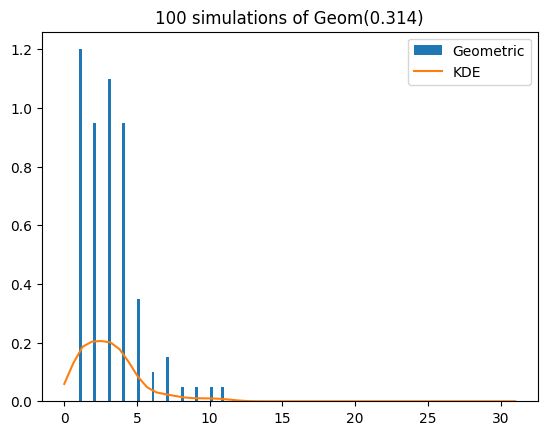

In [31]:
plot_samples(samples=n_tries,
             estimate_at=np.linspace(start=0, stop=np.round(n_sims*p), num=50),
             dist='Geometric',
             title='{0} simulations of Geom({1})'.format(n_sims, p))

# Poisson

A Poisson random variable counts the number of occurrences of a rare event in a fixed interval. If the probability of success is low then we succeed only a few times in a long series of trials. Each such event is a Poisson event because it happens so rarely.

In [32]:
lam = 1.0 # This is the rate of success $\lambda$ in the Poisson PMF.
n_events = rng.poisson(lam=lam, size=n_sims)

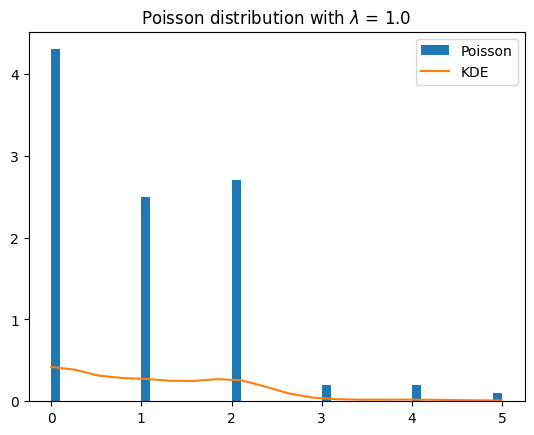

In [33]:
plot_samples(samples=n_events,
             estimate_at=np.linspace(0, 5, 20),
             dist='Poisson',
             title=r'Poisson distribution with $\lambda$ = {0}'.format(lam)
             )

# Uniform

We will consider the continuous distribution.

In [34]:
a = 0
b = 5
samples = rng.uniform(a, b, size=n_sims)
estimate_at = np.linspace(start=a, stop=b, num=50)

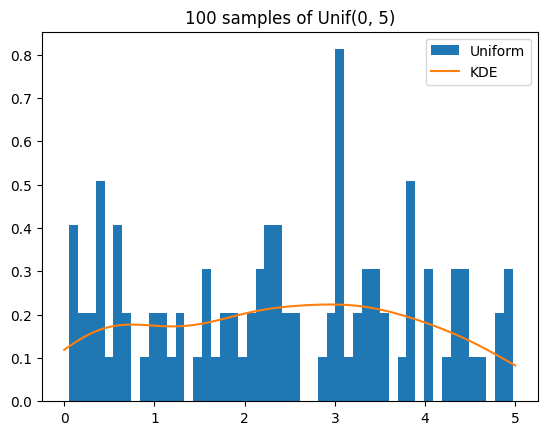

In [35]:
plot_samples(samples,
             estimate_at,
             'Uniform',
             '{0} samples of Unif({1}, {2})'.format(n_sims, a, b))

This is how a typical, randomly drawn sample looks like. Although it is draw from a uniform distribution, the sample points are not evenly distributed. To check whether this is truly a uniform distribution, we carry out a statistical test.

In [36]:
expected = np.linspace(start=a, stop=b, num=n_sims)
ks_result = scstat.ks_2samp(data1=samples, data2=expected, alternative='two-sided')
h0 = 'Sample points are uniformly distributed.'
print(ks_result)
if ks_result.pvalue < 0.05:
    print('Reject: {0}'.format(h0))
else:
    print('Fail to reject: {0}'.format(h0))

KstestResult(statistic=0.06, pvalue=0.9942356257694902, statistic_location=3.5732425782988693, statistic_sign=1)
Fail to reject: Sample points are uniformly distributed.


# Normal

In [37]:
mu = 1.5
sigma = 2.75
samples = rng.normal(loc=mu, scale=sigma, size=n_sims)
limits = mu + np.array([-1, 1]) * 3 * sigma
estimate_at = np.linspace(start=limits[0], stop=limits[1], num=50)

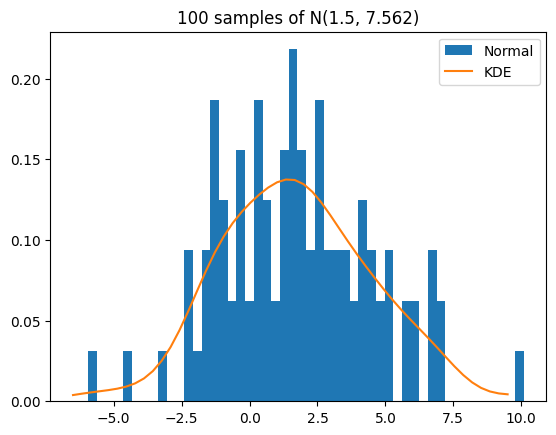

In [38]:
plot_samples(samples, estimate_at, 'Normal', '{0} samples of N({1}, {2})'.format(n_sims, np.round(mu, 3), np.round(sigma**2, 3)))

# Exponential

In [39]:
beta = 3
samples = rng.exponential(scale=beta, size=n_sims)
estimate_at = np.linspace(start=0, stop=6 * beta, num=50) # Exponential distribution is not symmetric, so limits have to be separately specified.

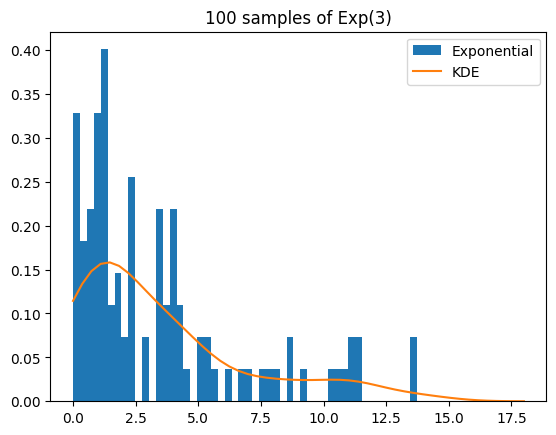

In [40]:
plot_samples(samples, estimate_at, 'Exponential', '{0} samples of Exp({1})'.format(n_sims, beta))

# Gamma

In [46]:
shape = 3
scale = 2
mu = shape * scale
sigma = np.sqrt(shape) * scale
estimate_at = np.linspace(start=0, stop=6*sigma, num=int(n_sims/20))
samples = rng.gamma(shape, scale, size=n_sims)

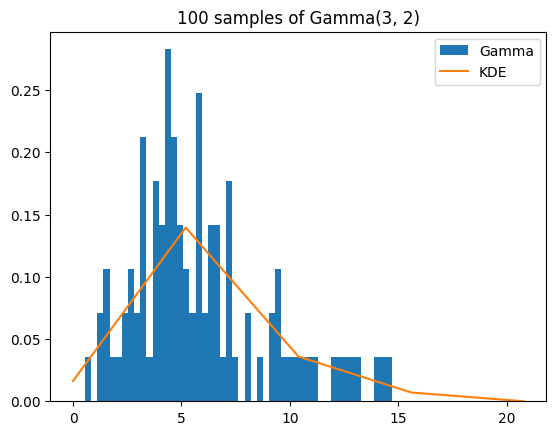

In [47]:
plot_samples(samples,
             estimate_at,
             'Gamma',
             '{0} samples of Gamma({1}, {2})'.format(n_sims, shape, scale))

# Beta

In [54]:
shape = 3
scale = 2
mu = shape/(shape + scale)
sigma = np.sqrt(shape) * scale
estimate_at = np.linspace(start=0, stop=1, num=int(n_sims/20))
samples = rng.beta(shape, scale, size=n_sims)

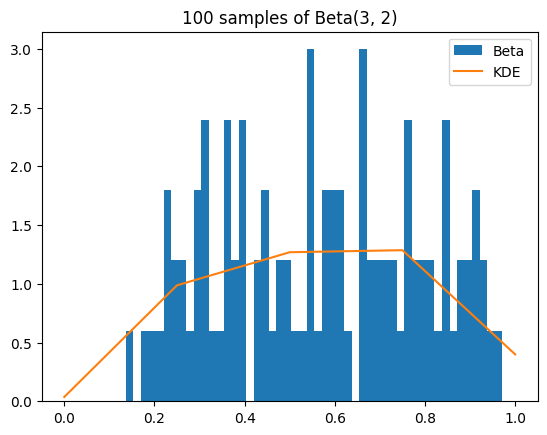

In [55]:
plot_samples(samples,
             estimate_at,
             'Beta',
             '{0} samples of Beta({1}, {2})'.format(n_sims, shape, scale))

# Student's t

In [56]:
nu = 5
mu = 0
sigma = np.sqrt(nu/(nu - 2))
limits = mu + np.array([-1, 1]) * 3 * sigma
estimate_at = np.linspace(start=limits[0], stop=limits[1], num=50)
samples = rng.standard_t(df=nu, size=n_sims)

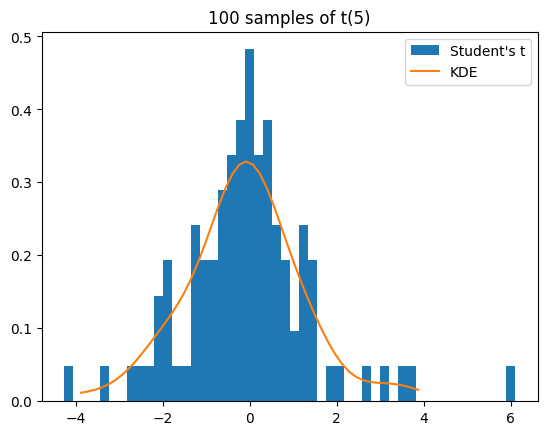

In [57]:
plot_samples(samples,
             estimate_at,
             "Student's t",
             '{0} samples of t({1})'.format(n_sims, nu))

# $\chi^2$

In [58]:
nu = 5
mu = nu
sigma = np.sqrt(2 * nu)
estimate_at = np.linspace(start=0, stop=6*nu, num=50)
samples = rng.chisquare(df=nu, size=n_sims)

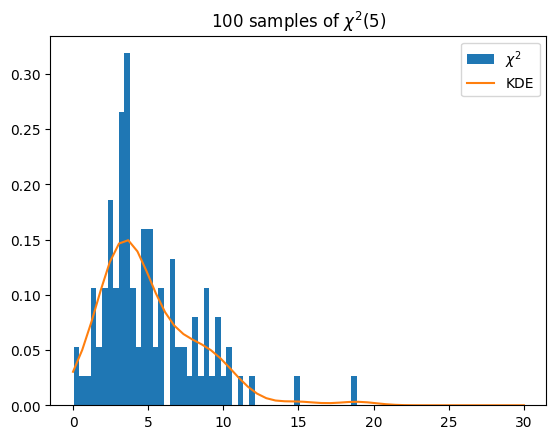

In [60]:
plot_samples(samples,
             estimate_at,
             r'$\chi^2$',
             r'{0} samples of $\chi^2$({1})'.format(n_sims, nu))